# __Mini-Projet Pendule__
### __LECLAIR Raphaël 21303231__

Dans ce mini-projet nous allons nous intérésser à la résolution numérique d'une EDO d'ordre 2.\
Plus précisement nous allons résoudre grâce à la méthode RK4 l'équation du mouvement d'un pendule simple.\
\
Nous allons résoudre les équations du mouvement d'un pendule simple ammorti d'abord dans l'approximation des petits angles,\
ensuite avec une force excitatrice et enfin avec une force excitatrice et sans faire l'approximation des petits angles.

!["Schema du Pendule"](SchemaPendule.png)

## __Méthode RK4__

Considérons les  équations différentielles ordinaires d'ordre 1 de la forme :

$$
    u'(t) = F(u,t)
$$

avec une  condition initiale :

$$
u(0) = U_0
$$

où $u$ est une quantité scalaire ou vectorielle.

L'intégration de l'EDO entre $t_k$ et $t_{k+1}= t_k+\Delta t $ 
donne formellement :

$$
u(t_{k+1})-u(t_k) = \int_{t_k}^{t_k+\Delta t} \, F(u(t),t)\,\text{d}t
$$
\
On va alors approximer cette intégrale et calculer la valeur de $u(t_{k+1})$, en connaissant $u(t_k)$, grâce à l'algorithme suivant:
$$
    d_1 =   F\left(t_k   , u_{k} \right)          
$$

$$
    d_2 =   F\left(t_k + \frac{\Delta t}{2}  , u_{k} + \frac{\Delta t}{2} d_1 \right)
$$

$$
    d_3 =   F\left(t_k + \frac{\Delta t}{2}  , u_{k} + \frac{\Delta t}{2} d_2 \right) 
$$

$$
    d_4 =   F\left(t_k + \Delta t  , u_{k} + \Delta t d_3\right)            
$$

$$
    u_{k+1} =  u_k  +  \frac{\Delta t}{6} \left[ d_1+ 2 d_2  + 2 d_3 + d_4 \right]
$$

où l'erreur par pas est d'ordre $\Delta t^5$ et l'erreur cumulée est  d'ordre $\Delta t^4$.\
\
On peut ainsi cacluler récursivement différents points de la fonction $u$ en connaissant les conditions initiales $u(0) = U_0$.

## Approximation des petits angles

On considère le pendule simple de la figure, dont l'équation du mouvement libre s'écrit : 

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
et qui dans le cas des petits angles se simplifie :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

où $\theta$ est l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide. On utilisera par commodité la valeur suivante : $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$. 

Nous allons résoudre cette équation linéarisée avec la méthode RK4 ci-dessus pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$.

On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
Omega=1 #rad/s
q=np.array([1,2,5]) #s^{-1}
theta0=10*np.pi/180 #rad
omega0=0 #rad/s
p_ini=np.array([theta0,omega0]) #paramètres initiaux
dt=0.05 #s

In [47]:
#Méthode RK4
def RK4(start, end, step, v_ini, F, ordre):
    '''
        Application de la méthode RK4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 
    
    # Boucle for
    for i in range(num_points - 1):
        d1=F(v[:, i], t[i])
        d2=F(v[:, i]+d1*step/2, t[i]+step/2)
        d3=F(v[:, i]+d2*step/2, t[i]+step/2)
        d4=F(v[:, i]+d3*step, t[i]+step)
        v[:, i+1]=v[:, i]+(step/6)*(d1+2*d2+2*d3+d4)

    # Argument de sortie
    return t, v

$$
\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$
On pose maintenant $\omega=\frac{\mathrm{d}\theta}{\mathrm{d}t}$, on a alors le système d'équations différentielles suivant:
$$
\frac{\mathrm{d}\theta}{\mathrm{d}t}=\omega
$$
$$
\frac{\mathrm{d}\omega}{\mathrm{d}t}=-q\omega-\Omega^{2}\theta
$$

In [48]:
def F0(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 0 de q
    """
    return np.array([V[1], -q[0]*V[1] - Omega**2*V[0]])

def F1(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 1 de q
    """
    return np.array([V[1], -q[1]*V[1] - Omega**2*V[0]])

def F2(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 2 de q
    """
    return np.array([V[1], -q[2]*V[1] - Omega**2*V[0]])

In [49]:
t,Theta0=RK4(0, 20, dt, p_ini, F0, 2)
Theta1=RK4(0, 20, dt, p_ini, F1, 2)[1]
Theta2=RK4(0, 20, dt, p_ini, F2, 2)[1]

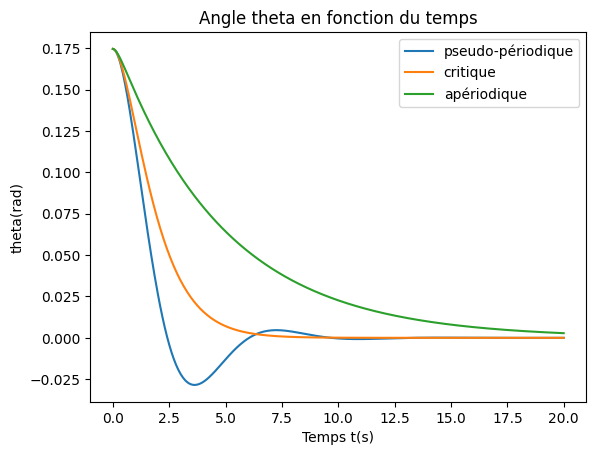

In [50]:
#Affichage
plt.plot(t,Theta0[0], label="pseudo-périodique")
plt.plot(t,Theta1[0], label="critique")
plt.plot(t,Theta2[0], label="apériodique")
plt.xlabel("Temps t(s)")
plt.ylabel("theta(rad)")
plt.title("Angle theta en fonction du temps")
plt.legend()
plt.show()

## Force d'excitation

On ajoute maintenant une force d'excitation au pendule de sorte que l'équation du mouvement s'écrive : 

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Nous allons résoudre cette nouvelle équation une force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$.

Nous allons tracer la trajectoire dans l'espace des phase $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ pour le pendule libre ($q=0$ et $F_e=0$), amorti ($q=1$ et $F_e=0$), et amorti avec excitation ($q=1$ et $F_e=1$).

On prendra toujours comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$.

On obitent cette fois le système d'équations différentielles suivant:
$$
\frac{\mathrm{d}\theta}{\mathrm{d}t}=\omega
$$
$$
\frac{\mathrm{d}\omega}{\mathrm{d}t}=-q\omega-\Omega^{2}\theta+F_e\sin(\Omega_e t)
$$

In [51]:
Omega_e=(2/3)*Omega
Fe=np.array([0,1]) #rad/s^2
q=Fe #s^{-1}

In [52]:
def F2_0(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 0 de q et 0 de Fe
    """
    return np.array([V[1], -q[0]*V[1] - Omega**2*V[0]] + Fe[0]*np.sin(Omega_e*t))

def F2_1(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 1 de q et 0 de Fe
    """
    return np.array([V[1], -q[1]*V[1] - Omega**2*V[0]] + Fe[0]*np.sin(Omega_e*t))

def F2_2(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 1 de q et 1 de Fe
    """
    return np.array([V[1], -q[1]*V[1] - Omega**2*V[0]] + Fe[1]*np.sin(Omega_e*t))

In [53]:
t,Theta2_0=RK4(0, 20, dt, p_ini, F2_0, 2)
Theta2_1=RK4(0, 20, dt, p_ini, F2_1, 2)[1]
Theta2_2=RK4(0, 20, dt, p_ini, F2_2, 2)[1]

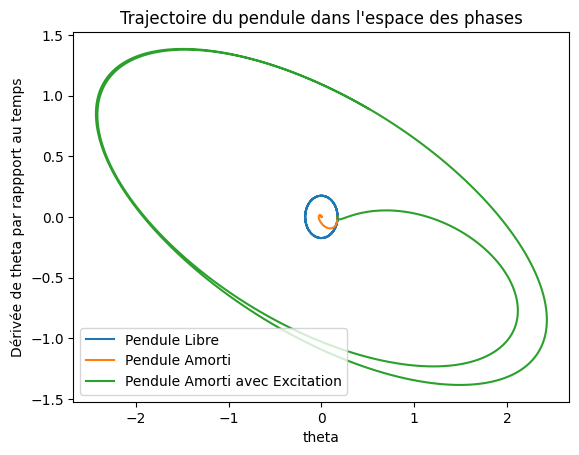

In [54]:
plt.plot(Theta2_0[0],Theta2_0[1], label="Pendule Libre")
plt.plot(Theta2_1[0],Theta2_1[1], label="Pendule Amorti")
plt.plot(Theta2_2[0],Theta2_2[1], label="Pendule Amorti avec Excitation")
plt.xlabel("theta")
plt.ylabel("Dérivée de theta par rappport au temps")
plt.title("Trajectoire du pendule dans l'espace des phases")
plt.legend()
plt.show()

$\quad$ __Pour le pendule libre__ on voit bien que la trajectoire fait une ellipse, ce qui est logique puisque rien n'est là pour le freiner ou l'accélerer à part la gravité,\
l'énergie d'un pendule libre est conservée. La trajectoire n'est pas un cercle car la vitesse angulaire du pendule n'est pas constante.\
\
$\quad$ __Le pendule amorti__ lui ne fait qu'une partie d'ellipse, la trajectoire s'arrête rapidement. Cela vient de 2 choses, la première est la vitesse angulaire initiale\
du pendule qui est choisie nulle et la deuxième et la valeur du coefficient de frottements fluides (on l'a pris à $q=1\ s^{-1}$ alors\
que pour les frottements avec l'air et pour une boule lisse ou une automobile on a des coefficients vers $0.4$/$0.5$ et $0.3$).\
\
$\quad$ La dernière trajectoire est celle du __pendule amorti avec force excitatrice__. Sa trajectoire est aussi ellipsoïdale mais l'ellipse s'agrandit.\
Cela nous indique, qu'avec les valeurs choisies, les frottements ne sont pas suffisant pour compenser la force excitatrice qui accélère le pendule.

## Mouvement chaotique, force excitatrice

Lorsque l'on ne fait plus l'hypothèse des petits angles ($\sin\theta\approx\theta$), on obtient une équation différentielle d'ordre 2 qui n'est pas linéaire :
$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Pour certaines valeurs des paramètres physiques, le comportement du pendule sera chaotique. Afin d'illustrer ce comportement, on se placera dans les conditions suivantes : $\theta(t=0)=10\mathrm{~°}$ et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=\frac{2}{3}\Omega$, $q=0.5\mathrm{~s^{-1}}$. 

Nous allons résoudre l'équation du mouvement non-linéaire pour les valeurs suivantes de l'amplitude d'excitation : $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.

Nous allons tracer $\theta(t)$ sur un temps de $100\mathrm{~s}$.

Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, nous allons aussi calculer l'évolution de $\theta(t)$ pour deux conditions initiales très proches l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Nous tracerons ensuite la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique.

On obtient le système d'équations différentielles suivant:
$$
\frac{\mathrm{d}\theta}{\mathrm{d}t}=\omega
$$
$$
\frac{\mathrm{d}\omega}{\mathrm{d}t}=-q\omega-\Omega^{2}\sin\theta+F_e\sin(\Omega_e t)
$$

In [55]:
q=0.5 #s^{-1}
Fe=np.array([1.4,1.44,1.465,1.5]) #rad/s^2

In [56]:
def F3_0(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 0 de Fe
    """
    return np.array([V[1], -q*V[1] - Omega**2*V[0]] + Fe[0]*np.sin(Omega_e*t))

def F3_1(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 1 de Fe
    """
    return np.array([V[1], -q*V[1] - Omega**2*V[0]] + Fe[1]*np.sin(Omega_e*t))

def F3_2(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 2 de Fe
    """
    return np.array([V[1], -q*V[1] - Omega**2*V[0]] + Fe[2]*np.sin(Omega_e*t))

def F3_3(V,t):
    """ Renvoie le système d'équations différentielles
        pour la valeur 3 de Fe
    """
    return np.array([V[1], -q*V[1] - Omega**2*V[0]] + Fe[3]*np.sin(Omega_e*t))

In [69]:
#Re-définition adaptée à la nouvelle fonction de la méthode RK4
#On doit garder l'angle entre -pi et pi
def RK4(start, end, step, v_ini, F, ordre):
    '''
        Application de la méthode RK4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 
    
    # Boucle for
    for i in range(num_points - 1):
        d1=F(v[:, i], t[i])
        d2=F(v[:, i]+d1*step/2, t[i]+step/2)
        d3=F(v[:, i]+d2*step/2, t[i]+step/2)
        d4=F(v[:, i]+d3*step, t[i]+step)
        v[:, i+1]=v[:, i]+(step/6)*(d1+2*d2+2*d3+d4)
        
        if v[0, i+1]<-np.pi or v[0, i+1]>np.pi :
            v[0, i+1]=v[0, i+1]%np.pi 

    # Argument de sortie
    return t, v

In [70]:
t,Theta3_0=RK4(0, 100, dt, p_ini, F3_0, 2)
Theta3_1=RK4(0, 100, dt, p_ini, F3_1, 2)[1]
Theta3_2=RK4(0, 100, dt, p_ini, F3_2, 2)[1]
Theta3_3=RK4(0, 100, dt, p_ini, F3_3, 2)[1]

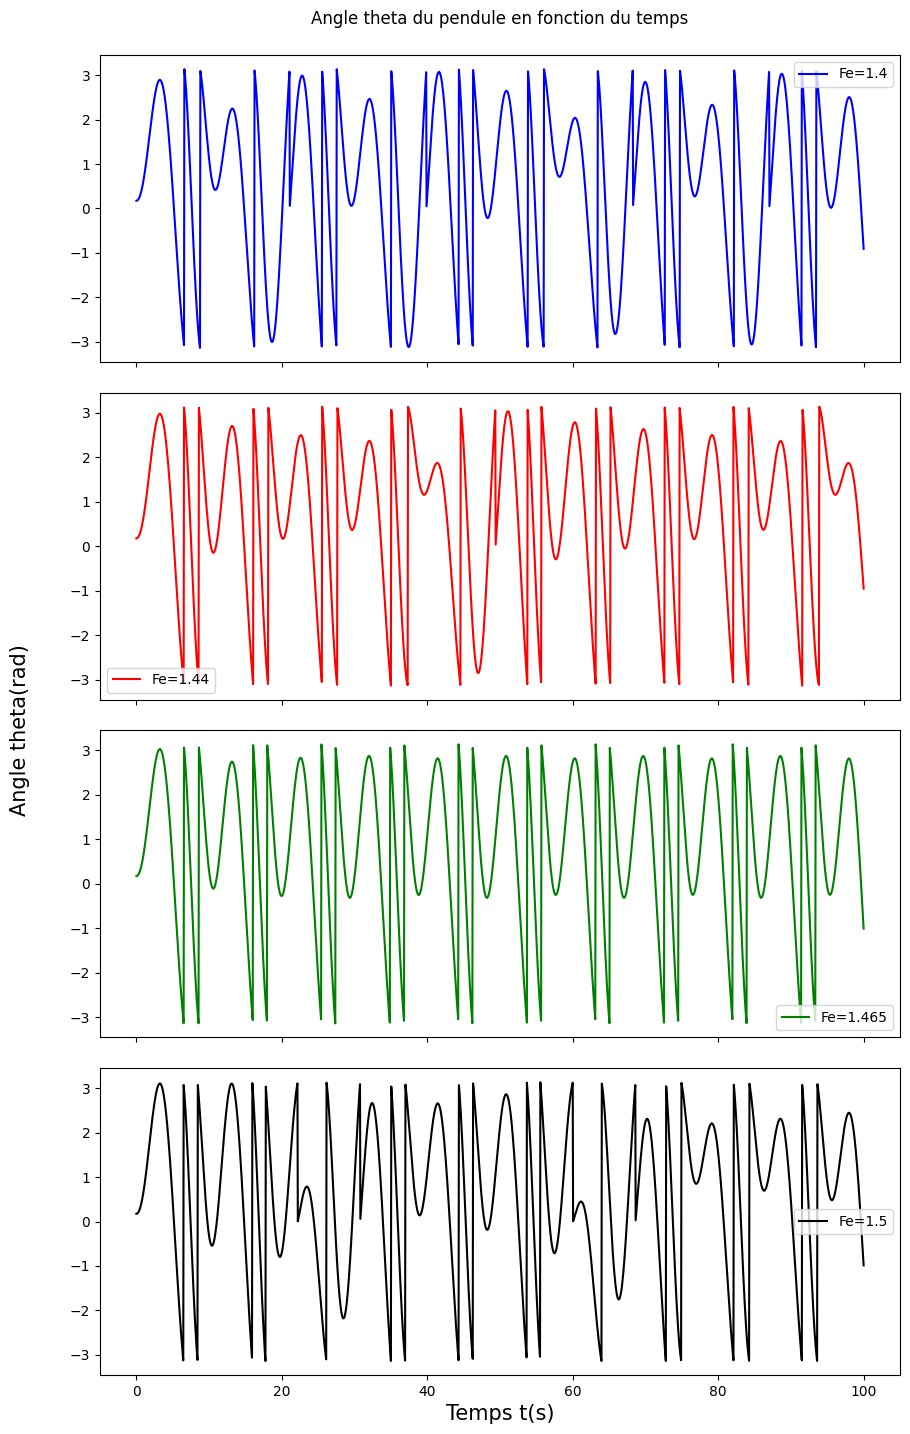

In [71]:
fig, axs = plt.subplots(4, sharex=True, sharey=True,figsize=(10,15))

fig.text(0.5, 0.04, 'Temps t(s)', ha='center', fontsize=15)
fig.text(0.01, 0.5, 'Angle theta(rad)', va='center', rotation='vertical',fontsize=15)

axs[0].plot(t,Theta3_0[0], color="blue", label="Fe=1.4")
axs[0].legend()

axs[1].plot(t,Theta3_1[0], color="red", label="Fe=1.44")
axs[1].legend()

axs[2].plot(t,Theta3_2[0], color="green", label="Fe=1.465")
axs[2].legend()

axs[3].plot(t,Theta3_3[0], color="black", label="Fe=1.5")
axs[3].legend()


plt.subplots_adjust(left=0.1, right=0.9, 
                    top=0.95, bottom=0.07, 
                    wspace=0.4, hspace=0.1)

fig.suptitle("Angle theta du pendule en fonction du temps")
plt.show()

$\quad$ Les 4 trajectoires ont la même forme générale mais sont différentex en un certain nombre de points..\
On observe de plus que __la période des 4 pendules semble diminuer avec le temps__.\
$\quad$ Cela vient, comme pour la trajectoire dans l'espace des phases du pendule amorti avec force excitatrice dans la partie\
précédente, du fait que la force excitatrice accélère le pendule.

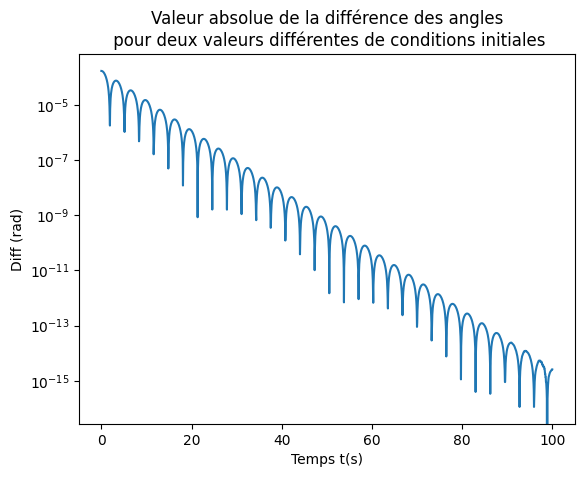

In [72]:
p2_ini=np.array([9.99*np.pi/180,0])
t,Theta32_3=RK4(0, 100, dt, p2_ini, F3_3, 2)
Diff=abs(Theta32_3[0]-Theta3_3[0])

plt.semilogy(t,Diff)
plt.xlabel("Temps t(s)")
plt.ylabel("Diff (rad)")
plt.title("Valeur absolue de la différence des angles\n pour deux valeurs différentes de conditions initiales")
plt.show()

$\quad$ On voit que __la différence diminue fortement avec le temps__.\
On observe aussi des pic vers le bas, cela vient probablement du fait que -pendant les phases\
de ralentissement du 1er pendule (avant de retomber)- le 2ème a le temps de le rattrapper légèrement.\
Le différence entre les deux angles diminue donc à chaque période.